3-)  Considere uma rede deep learning  convolutiva  (treinada)  - CNN aplicada  à classifi
cação de padrões em imagens. A base de dados considerada é a CIFAR-10 (pesquise).  A
referida base de dados consiste de 60 mil imagens coloridas de 32x32 pixels, com 50 mil
para treino e 10 mil para teste. As imagens estão divididas em 10 classes, a saber: avião,
navio, caminhão, automóvel, sapo, pássaro, cachorro, gato, cavalo e cervo. Cada imagem
possui apenas um dos objetos da classe de interesse, podendo estar parcialmente obstruído
por outros objetos que não pertençam a esse conjunto. Apresente os resultados da classifi
cação em uma matriz de confusão.

In [ ]:
#carregando dados

from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
#normalizando os valores que variam de 0-255 para 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
#Transforma os rótulos em one-hot

from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


Define e compila a CNN

In [ ]:
from tensorflow.keras.models import Sequential #forma linear de empilhar camadas
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Conv2D: camada convolucional
#MaxPooling2D: reduz o tamanho das imagens
#Flatten: transforma uma matriz 2D (ou 3D) em um vetor 1D.
#Dense: camada totalmente conectada

#define o modelo
model = Sequential([

    #32 filtros para detecção de padrões, bordas, textura...
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 56s 77ms/step - accuracy: 0.3478 - loss: 1.7855 - val_accuracy: 0.5432 - val_loss: 1.3014
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 79ms/step - accuracy: 0.5567 - loss: 1.2487 - val_accuracy: 0.6066 - val_loss: 1.1237
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.6179 - loss: 1.0900 - val_accuracy: 0.6042 - val_loss: 1.1247
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 74ms/step - accuracy: 0.6523 - loss: 0.9922 - val_accuracy: 0.6684 - val_loss: 0.9754
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.6784 - loss: 0.9302 - val_accuracy: 0.6754 - val_loss: 0.9340
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - accuracy: 0.7039 - loss: 0.8532 - val_accuracy: 0.6900 - val_loss: 0.8983
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.7190 - loss: 0.8029 - val_accuracy: 0.6990 - val_loss: 0.8813
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.7400 - loss: 0.7483 - 

In [ ]:
#desempenho final

loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Acurácia no teste: {accuracy*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6952 - loss: 0.9060
Acurácia no teste: 69.30%


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


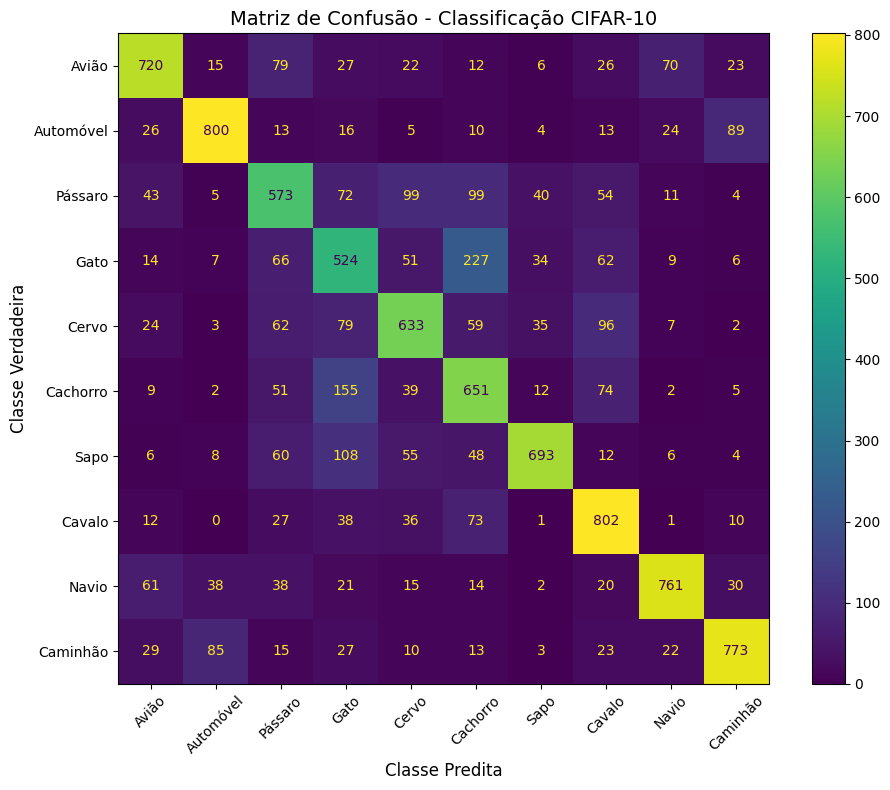

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obter predições
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Rótulos em português
rotulos_pt = [
    'Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo',
    'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão'
]

# Exibir matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rotulos_pt)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='viridis', xticks_rotation=45, ax=ax)

# Títulos e rótulos dos eixos em português
ax.set_title("Matriz de Confusão - Classificação CIFAR-10", fontsize=14)
ax.set_xlabel("Classe Predita", fontsize=12)
ax.set_ylabel("Classe Verdadeira", fontsize=12)
plt.tight_layout()
plt.show()
